In [1]:
import billboard
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import collections

In [2]:
SAVE_FIGURES = True

In [3]:
#add chart data to data frame & create dictionary of dataframes by year 

all_charts = {}

for i in range(0, 43):
  year = str(i + 1973)
  path = "./Data/charts/hot-100/" + year + "_hot-100.csv"
  df = pd.read_csv(path)
  all_charts[year] = df

charts_over_time = collections.OrderedDict(sorted(all_charts.items()))


In [4]:
# GET NUMBER OF UNIQUE SONGS BY YEAR 

yr = 1973 #NOTE: RIAA Sales data starts in 1973 
yrs = []
unique_songs = []

for year in charts_over_time: 
  #create years list
  yrs.append(yr) 
  df = charts_over_time[year]
  unique_songs.append(len(df.columns))
  yr +=1 



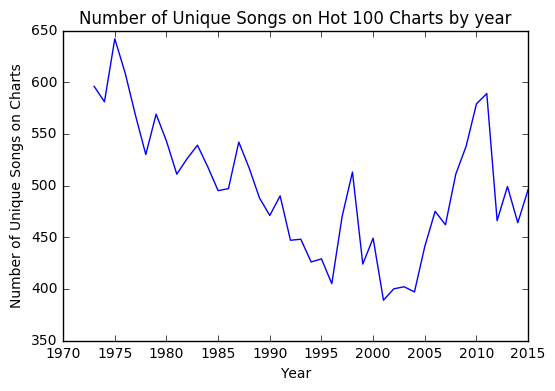

In [5]:
#PLOT NUMBER OF UNIQUE SONGS BY YEAR

plt.plot(yrs, unique_songs)
plt.title("Number of Unique Songs on Hot 100 Charts by year")
plt.xlabel("Year")
plt.ylabel('Number of Unique Songs on Charts')
if SAVE_FIGURES:
  plt.savefig("./Plots/Singles/Unique_Song1.png") 
plt.show()


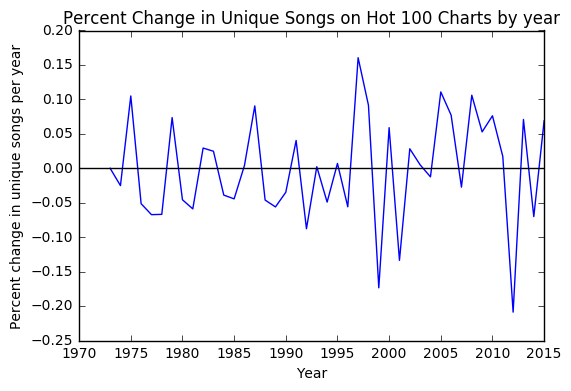

In [6]:
#Plot percentage change in unique songs year over year

unique = pd.Series(unique_songs, index=yrs).pct_change()
unique[1973]=0

plt.plot(unique)
plt.title("Percent Change in Unique Songs on Hot 100 Charts by year")
plt.xlabel("Year")
plt.ylabel('Percent change in unique songs per year')
plt.axhline(y=0, xmin=0, xmax=1000, linewidth=1, color = 'k')
if SAVE_FIGURES:
  plt.savefig("./Plots/Singles/pct_change_unique1.png") 
plt.show()


In [7]:
avgs = []

for year in charts_over_time: 
  df = charts_over_time[year]

  names = list(df.columns.values)
  sum = 0 
  for song in names: 
    sum += df[song].sum()

  avg = sum/len(names)
  avgs.append(avg)

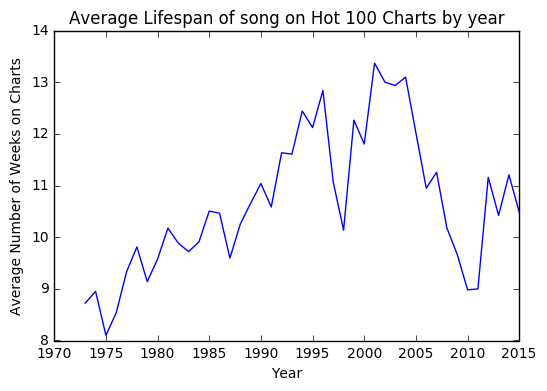

In [8]:
plt.plot(yrs, avgs)
plt.title("Average Lifespan of song on Hot 100 Charts by year")
plt.xlabel("Year")
plt.ylabel('Average Number of Weeks on Charts')
if SAVE_FIGURES: 
  plt.savefig("./Plots/Singles/Avg_Weeks_hot-100_1.png")  
plt.show()

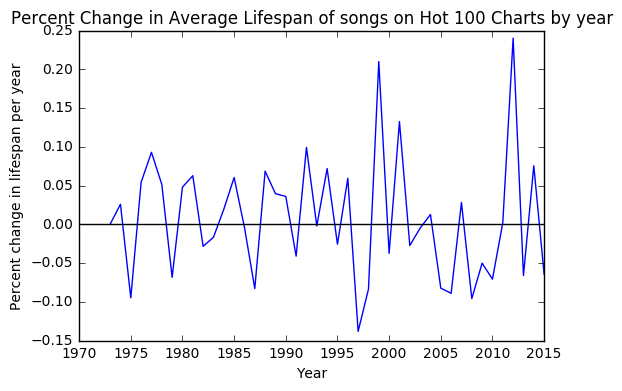

In [9]:
#Plot percentage change in average time on charts

time_on_charts = pd.Series(avgs, index=yrs).pct_change()
time_on_charts[1973]=0

plt.plot(time_on_charts)
plt.title("Percent Change in Average Lifespan of songs on Hot 100 Charts by year")
plt.xlabel("Year")
plt.ylabel('Percent change in lifespan per year')
plt.axhline(y=0, xmin=0, xmax=1000, linewidth=1, color = 'k')
if SAVE_FIGURES: 
  plt.savefig("./Plots/Singles/pct_change_lifespan1.png")
plt.show()


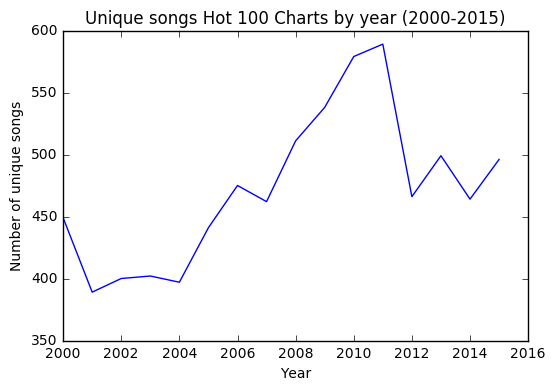

In [10]:
# FOCUS ON 2000 to Present 

plt.plot(yrs[27:], unique_songs[27:])
plt.title("Unique songs Hot 100 Charts by year (2000-2015)")
plt.xlabel("Year")
plt.ylabel('Number of unique songs')
if SAVE_FIGURES: 
  plt.savefig("./Plots/Singles/Unique_Songs_hot-100_2.png")  
plt.show()

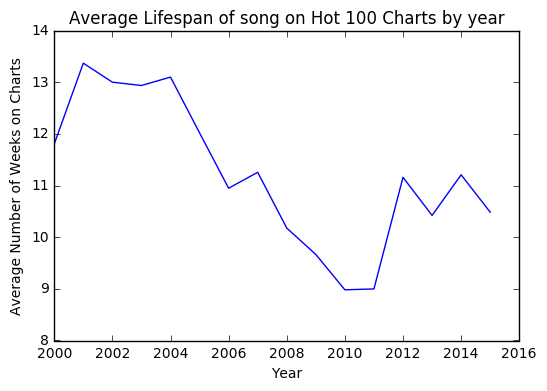

In [11]:
#Focus on 2000 to present

plt.plot(yrs[27:], avgs[27:]) # 27 = index of 2000 = 2000-1973 
plt.title("Average Lifespan of song on Hot 100 Charts by year")
plt.xlabel("Year")
plt.ylabel('Average Number of Weeks on Charts')
if SAVE_FIGURES: 
  plt.savefig("./Plots/Singles/Avg_Weeks_hot-100_2.png")  
plt.show()